In [40]:
%pylab nbagg
%load_ext autoreload
%autoreload 2

import fastcat.fastcat as fc
from glob import glob

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [138]:
CNRs = []

s = fc.Spectrum()
phantom = fc.Catphan_projections()

doses = np.arange(0.05,1.8,0.05)

s.load('W_spectrum_6')
kernel = fc.Kernel(s, 'CuGOS-784-micrometer')
angles = np.linspace(0,np.pi*2,2)

for dose in doses:

    phantom.return_projs(kernel,s,angles,det_on=True,mgy = dose/8)#20/nviews)
    CNRs.append(phantom.analyse_515(phantom.proj[0]))

(19, 41, 41) 19
really doing it!
ratio is 17.522136935685204 number of photons 0.0053004634067323865
really doing it!
ratio is 35.04427387137041 number of photons 0.0053004634067323865
really doing it!
ratio is 52.56641080705561 number of photons 0.0053004634067323865
really doing it!
ratio is 70.08854774274081 number of photons 0.0053004634067323865
really doing it!
ratio is 87.610684678426 number of photons 0.0053004634067323865
really doing it!
ratio is 105.1328216141112 number of photons 0.0053004634067323865
really doing it!
ratio is 122.65495854979642 number of photons 0.0053004634067323865
really doing it!
ratio is 140.17709548548163 number of photons 0.0053004634067323865
really doing it!
ratio is 157.6992324211668 number of photons 0.0053004634067323865
really doing it!
ratio is 175.221369356852 number of photons 0.0053004634067323865
really doing it!
ratio is 192.7435062925372 number of photons 0.0053004634067323865
really doing it!
ratio is 210.26564322822244 number of photo

In [144]:
CNRs2 = []

s = fc.Spectrum()
phantom = fc.Catphan_projections()

s.load('C_spectrum_25')
kernel = fc.Kernel(s, 'CuGOS-784-micrometer')
angles = np.linspace(0,np.pi*2,2)

for dose in doses:

    phantom.return_projs(kernel,s,angles,det_on=True,mgy = dose/2.3)#20/nviews)
    CNRs2.append(phantom.analyse_515(phantom.proj[0]))

(19, 41, 41) 19
really doing it!
ratio is 24.340818765425876 number of photons 0.04026543917603216
really doing it!
ratio is 48.68163753085175 number of photons 0.04026543917603216
really doing it!
ratio is 73.02245629627762 number of photons 0.04026543917603216
really doing it!
ratio is 97.3632750617035 number of photons 0.04026543917603216
really doing it!
ratio is 121.70409382712938 number of photons 0.04026543917603216
really doing it!
ratio is 146.04491259255525 number of photons 0.04026543917603216
really doing it!
ratio is 170.38573135798114 number of photons 0.04026543917603216
really doing it!
ratio is 194.726550123407 number of photons 0.04026543917603216
really doing it!
ratio is 219.06736888883285 number of photons 0.04026543917603216
really doing it!
ratio is 243.40818765425877 number of photons 0.04026543917603216
really doing it!
ratio is 267.74900641968463 number of photons 0.04026543917603216
really doing it!
ratio is 292.0898251851105 number of photons 0.0402654391760

<IPython.core.display.Javascript object>


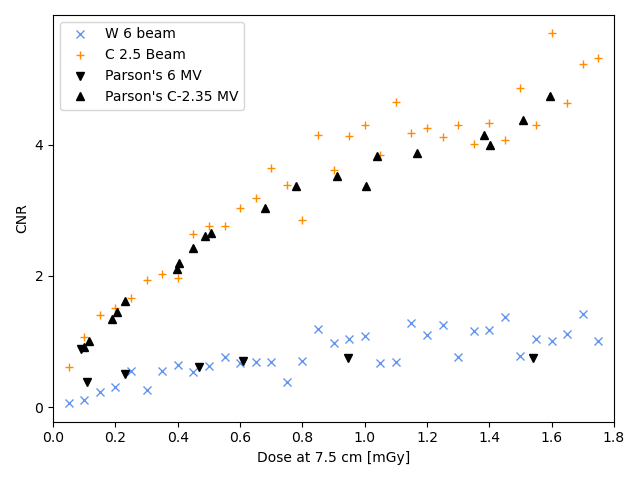

In [150]:
plt.figure()
# plt.subplot(211)
plt.plot(np.array(doses),CNRs,'x',c='cornflowerblue')
plt.plot(np.array(doses),CNRs2,'+',c='darkorange')
plt.xlim([0,1.8])
# plt.ylim([0,6])
plt.yticks([0,2,4,6])
real_dat = [
0.1079118028534371, 0.3828285707204646,
0.22931258106355384, 0.49820317727824737,
0.4679636835278859, 0.6142779251034725,
0.6101167315175098, 0.7011140300874876,
0.9473411154345006, 0.7508984113608763,
1.5398184176394292, 0.7544362933406026,
0.08819714656290528, 0.8890802746040798,
0.09961089494163422, 0.9178108503308637,
0.11621271076523998, 1.0134513866514654,
0.18988326848249026, 1.3387320627524852,
0.20440985732814526, 1.4439143473196365,
0.23035019455252914, 1.6160437681231254,
0.39636835278858623, 2.1042962650871146,
0.4036316472114137, 2.19988103794394,
0.44928664072632946, 2.42945302237973,
0.4866407263294423, 2.6016505985278444,
0.5053177691309987, 2.6495328260923436,
0.6796368352788584, 3.0327393491784185,
0.7782101167315174, 3.37727700810429,
1.0396887159533075, 3.82788297107735,
1.166277561608301, 3.866855436318124,
1.5066147859922177, 4.384811271654811,
1.594811932555123, 4.748395251431262,
1.4007782101167314, 4.002013680636447,
1.3831387808041504, 4.145220451560137,
1.0044098573281453, 3.3690735829884257,
0.9120622568093386, 3.521388386329277]
xx = real_dat[::2]
yy = real_dat[1::2]

plt.plot(xx[:7],yy[:7],'kv')
plt.plot(xx[7:],yy[7:],'k^')
plt.xlabel('Dose at 7.5 cm [mGy]')
plt.ylabel('CNR')
plt.legend(['W 6 beam','C 2.5 Beam','Parson\'s 6 MV','Parson\'s C-2.35 MV'])
plt.tight_layout()

In [141]:
np.save('CNR_w',CNRs)
np.save('CNR_c',CNRs2)

<IPython.core.display.Javascript object>


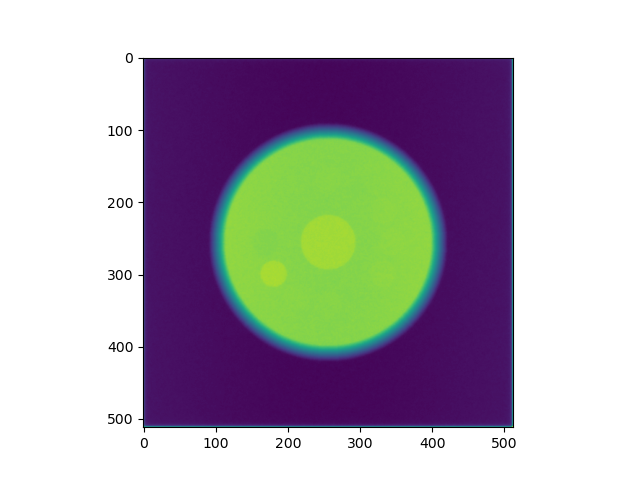

In [85]:
plt.figure()
plt.imshow(phantom.proj[0])

In [99]:
slc = phantom.proj[0]

In [108]:
(np.abs(np.mean(slc[250:260,250:260]) - np.mean(slc[280:290,205:215]))
              /np.sqrt(np.std(slc[250:260,250:260])**2 + np.std(slc[280:290,205:215])**2))

6.966950175578786

In [107]:
(np.abs(np.mean(slc[250:260,250:260]) - np.mean(np.mean(slc[310:320,250:260])))
              /np.sqrt(np.std(slc[250:260,250:260])**2 + np.std(slc[310:320,250:260])**2))

7.216710523125703

In [15]:
np.mean(slc[280:290,205:215])

7.558019961167016

In [16]:
np.std(slc[250:260,250:260])

0.1148509729119603